<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/FED_BATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Fed-Batch Bioreactor 

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

In a fed-batch bioreactor we consider a inflow with a concentrtion of subtrate but no biomass nor product. In this process we consider one substrate, one type of microorganims and one product. Also we consider that the growth rate is given by the Monod equation 


### 2. Assumptions 

1. The cell are growing exponentially

2. The fed-batch bioreactor is perfectly mixed

3. Heat effect are small so that isothermal reactor operation can be assumed

4. the liquid density is constant

5. The broth in the bioreactor consists of liquid plus solid material (i.e., cell mass). This heterogeneous mixture can be approximated as a homogeneous liquid

6. The rate of growth $r_g$ is given by the Monod model

7. The rate of product formation per unit volume $r_p$ can be expressed as 

$$r_P = Y_{P/X}r_g$$

8. The feed stream is sterile and thus contains no cells

### 3. Scheme of the process

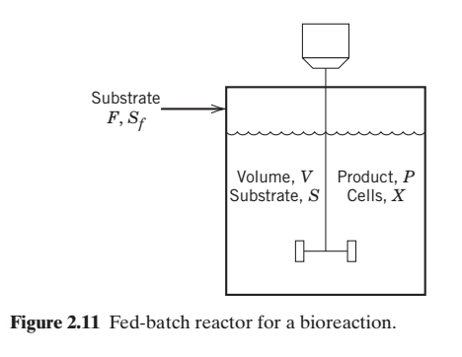

### Process network 

### 4. Data 

Table 1. Parameter values

|Parameter|	Value|Parameter|	Value|	
|:---:|:---:|:---:|:---:|
|$\mu_{max}$|	0.20 $h^{-1}$| $S_f$ | 10.0 g/L |
|$K_s$|	1.0g/L|$X_0$| 0.05 g/L|
|$Y_{X/S}$|	0.5| $S_0$| 10.0 g/L|
|$Y_{P/X}$|	0.2|$P_0$|0.0 g/L|		
|||$V_0$|1.0 L|





### 5. Analysis

### 5.1 Establish the model 

Total mass balance

$$\frac{d(\rho V)}{dt} = \rho F_i$$

Since $\rho$ is constant

$$
\frac{dV}{dt} = F \tag{1}
$$

Mass balance for cells

$$
\frac{d(XV)}{dt} = V r_g
$$

$$
\frac{dX}{dt} = r_g \tag{2}
$$

Mass balance for product

$$
\frac{d(PV)}{dt} = V r_P
$$

Considering $r_P = Y_{P/X}r_g$ we get 

$$
\frac{dP}{dt} = Y_{P/X}r_g \tag{3}
$$

Mass balance for substrate

$$
\frac{d(SV)}{dt} = - V r_s
$$

Considering $r_S = \frac{1}{Y_{X/S}}r_g$ we get 

$$
\frac{dS}{dt} = -\frac{1}{Y_{X/S}}r_g \tag{4}
$$

#### 5.2 Nmerical simulation 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
def fed_batch(s,time,F):

    # state variables
    V = s[0]
    x = s[1]
    p = s[2]
    s = s[3]

    # parameters
    mu_max = 0.2 
    ks = 1.0
    Yxs = 0.5
    Ypx = 0.2
    Yps = 0.1
    sf = 10

    # total mass balance 
    dVdt = F

    # kinetic expressions 
    rg = mu_max*s/(ks+s)*x

    rp = Ypx*rg

    rs = (1/Yxs)*rg

    # mass balance for cell
    dxdt = rg

    # mass balance for product
    dpdt = rp

    # mass balance for substrate
    dsdt = F/V*sf - rs - (1/Yps)*rp

    return [dVdt, dxdt, dpdt, dsdt]

In [17]:
# initial conditions 
init = [1.0, 0.05, 0, 10] # L, g/L, g/L, g/L
# integration time
time = np.linspace(0,30,100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

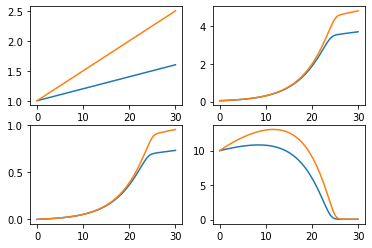

In [18]:
# simulate for different values of F
for F in [0.02, 0.05]: # L/h
    out = odeint(fed_batch, init, time, args=(F, ))
    V = out[:,0]
    x = out[:,1]
    p = out[:,2]
    s = out[:,3]
    plt.subplot(2,2,1)
    plt.plot(time, V)
    plt.subplot(2,2,2)
    plt.plot(time, x)
    plt.subplot(2,2,3)
    plt.plot(time, p)
    plt.subplot(2,2,4)
    plt.plot(time, s)